# Decision Tree Model

Creating a decision tree model to predict the outcome of an premier league game.

## Importing Libraries

In [10]:
# ML libraries
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Data processing libraries
import pandas as pd

# Visuals
#!pip install graphviz
#!pip install pydotplus
#!pip install IPython
#import graphviz
#import pydotplus
#from IPython.display import Image
from matplotlib import pyplot as plt

## Loading datasets

In [11]:
df = pd.read_csv(r"League_Result_Data/Encoded_PremierLeague_Stats_From_2014to2021.csv")
time_df = pd.read_csv(r"League_Result_Data/TimeEncoded_PremierLeague_Stats_From_2014to2021.csv")

## Normal Dataset (Time Isn't Included)

### Splitting data

The data with be split into training and test data to ensure the integrity and proformance of the model

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2569 entries, 0 to 2568
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             2569 non-null   int64  
 1   Season                 2569 non-null   object 
 2   Season Encoding        2569 non-null   int64  
 3   Date                   2569 non-null   object 
 4   YearOfSeason           2414 non-null   object 
 5   HomeTeam               2569 non-null   object 
 6   HomeTeam Encoding      2569 non-null   int64  
 7   AwayTeam               2569 non-null   object 
 8   AwayTeam Encoding      2569 non-null   int64  
 9   FTHG                   2569 non-null   float64
 10  FTAG                   2569 non-null   float64
 11  FTR                    2569 non-null   object 
 12  FTR Encoding           2569 non-null   int64  
 13  HTHG                   2569 non-null   float64
 14  HTAG                   2569 non-null   float64
 15  HTR 

In [13]:
"""
# Features -- Drops FTR and any categorical value 
X = df.drop(columns=["HTHG", "HTAG", "HTR Encoding", "Unnamed: 0", "FTHG", "FTAG" "Season", "YearOfSeason", "Date", "HomeTeam", "AwayTeam", "Referee", "FTR", "FTR Encoding", "HTR", "Referee"])
# Labels
y = df["FTR Encoding"]

"""
# Features -- Drops FTR and any categorical value 
X = df.drop(columns=["Unnamed: 0", "Season", "YearOfSeason", "Date", "FTHG", "FTAG", "HomeTeam", "AwayTeam", "Referee", "FTR", "FTR Encoding", "HTR", "Referee"])
# Labels
y = df["FTR Encoding"]

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2569 entries, 0 to 2568
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Season Encoding        2569 non-null   int64  
 1   HomeTeam Encoding      2569 non-null   int64  
 2   AwayTeam Encoding      2569 non-null   int64  
 3   HTHG                   2569 non-null   float64
 4   HTAG                   2569 non-null   float64
 5   HTR Encoding           2569 non-null   int64  
 6   Referee Encoding       2569 non-null   int64  
 7   Fouls Called Per Game  2569 non-null   float64
 8   HS                     2569 non-null   float64
 9   AS                     2569 non-null   float64
 10  HST                    2569 non-null   float64
 11  AST                    2569 non-null   float64
 12  HF                     2569 non-null   float64
 13  AF                     2569 non-null   float64
 14  HC                     2569 non-null   float64
 15  AC  

In [15]:
X

,Season Encoding,HomeTeam Encoding,AwayTeam Encoding,HTHG,HTAG,HTR Encoding,Referee Encoding,Fouls Called Per Game,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,0,8,0,0.0,1.0,1,7,14.0,5.0,13.0,2.0,6.0,12.0,12.0,2.0,3.0,2.0,2.0,0.0,0.0
1,0,6,21,1.0,0.0,0,27,14.0,5.0,9.0,3.0,5.0,14.0,11.0,7.0,3.0,2.0,1.0,0.0,0.0
2,0,13,11,3.0,2.0,0,28,14.0,22.0,6.0,6.0,3.0,9.0,6.0,9.0,0.0,1.0,0.0,0.0,0.0
3,0,28,17,0.0,0.0,2,11,13.0,15.0,15.0,3.0,2.0,13.0,7.0,8.0,7.0,2.0,2.0,0.0,0.0
4,0,27,12,0.0,0.0,2,10,15.0,7.0,13.0,1.0,7.0,12.0,9.0,2.0,5.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2564,2,7,25,0.0,1.0,1,27,14.0,9.0,16.0,1.0,3.0,12.0,8.0,3.0,5.0,1.0,2.0,0.0,0.0
2565,2,10,15,0.0,0.0,2,15,13.0,16.0,7.0,6.0,1.0,12.0,15.0,8.0,1.0,2.0,2.0,0.0,1.0
2566,2,12,19,2.0,0.0,0,28,14.0,22.0,18.0,7.0,2.0,7.0,6.0,5.0,6.0,0.0,0.0,0.0,0.0
2567,2,14,21,1.0,0.0,0,2,14.0,15.0,13.0,6.0,4.0,13.0,8.0,8.0,4.0,1.0,1.0,0.0,0.0


In [16]:
"""
Target Varible - Full Time Results
0 - Home Team Win
1 - Away Team Win
2 - Draw
"""
y

0       1
1       0
2       0
3       1
4       1
       ..
2564    1
2565    2
2566    0
2567    0
2568    0
Name: FTR Encoding, Length: 2569, dtype: int64

In [17]:
# Splitting the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
# Scaling varibles to unit variance
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Fitting the model

Fitting the data to a decision tree model

In [19]:
# Declaring the decision tree classifier
tree_clf = tree.DecisionTreeClassifier(max_leaf_nodes = 15, 
                                      max_features=10,
                                      random_state=42,
                                      min_samples_split=3)

# Training the decision tree
clf_train = tree_clf.fit(X_train, y_train)

In [20]:
score = clf_train.score(X_test, y_test)

print(score)

0.6653696498054474


In [21]:
# Confusion Matrix

cv_score = cross_val_score(clf_train, X_train, y_train, cv=3, scoring='accuracy')

print(cv_score, '\n')

y_train_pred = cross_val_predict(clf_train, X_train, y_train, cv=3)
print(confusion_matrix(y_train, y_train_pred))

[0.61605839 0.66569343 0.62919708] 

[[732 108  79]
 [101 484  64]
 [228 166  93]]


In [22]:
# Precision, Recall, F1

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.69      0.80      0.74       919
           1       0.64      0.75      0.69       649
           2       0.39      0.19      0.26       487

    accuracy                           0.64      2055
   macro avg       0.57      0.58      0.56      2055
weighted avg       0.60      0.64      0.61      2055



## Visualizing the tree

Create visual plots for the decision tree

In [23]:
fn = list(X.columns)
cn ='0', '1', '2'

In [24]:
cn

('0', '1', '2')

[Text(117.57857142857144, 201.90857142857143, 'X[11] <= -0.19\ngini = 0.644\nsamples = 2055\nvalue = [919, 649, 487]'),
 Text(47.82857142857143, 170.84571428571428, 'X[5] <= -0.674\ngini = 0.568\nsamples = 969\nvalue = [562, 145, 262]'),
 Text(31.885714285714286, 139.78285714285715, 'gini = 0.204\nsamples = 397\nvalue = [352, 5, 40]'),
 Text(63.77142857142857, 139.78285714285715, 'X[4] <= -0.069\ngini = 0.655\nsamples = 572\nvalue = [210, 140, 222]'),
 Text(31.885714285714286, 108.72, 'X[10] <= -0.821\ngini = 0.617\nsamples = 355\nvalue = [155, 54, 146]'),
 Text(15.942857142857143, 77.65714285714284, 'gini = 0.617\nsamples = 86\nvalue = [18, 24, 44]'),
 Text(47.82857142857143, 77.65714285714284, 'gini = 0.584\nsamples = 269\nvalue = [137, 30, 102]'),
 Text(95.65714285714286, 108.72, 'X[3] <= -0.223\ngini = 0.656\nsamples = 217\nvalue = [55, 86, 76]'),
 Text(79.71428571428572, 77.65714285714284, 'gini = 0.579\nsamples = 122\nvalue = [16, 67, 39]'),
 Text(111.6, 77.65714285714284, 'gini 

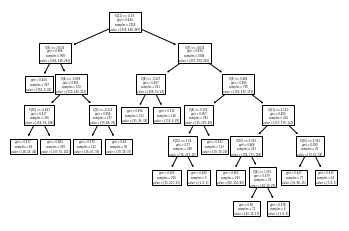

In [25]:
tree.plot_tree(clf_train)

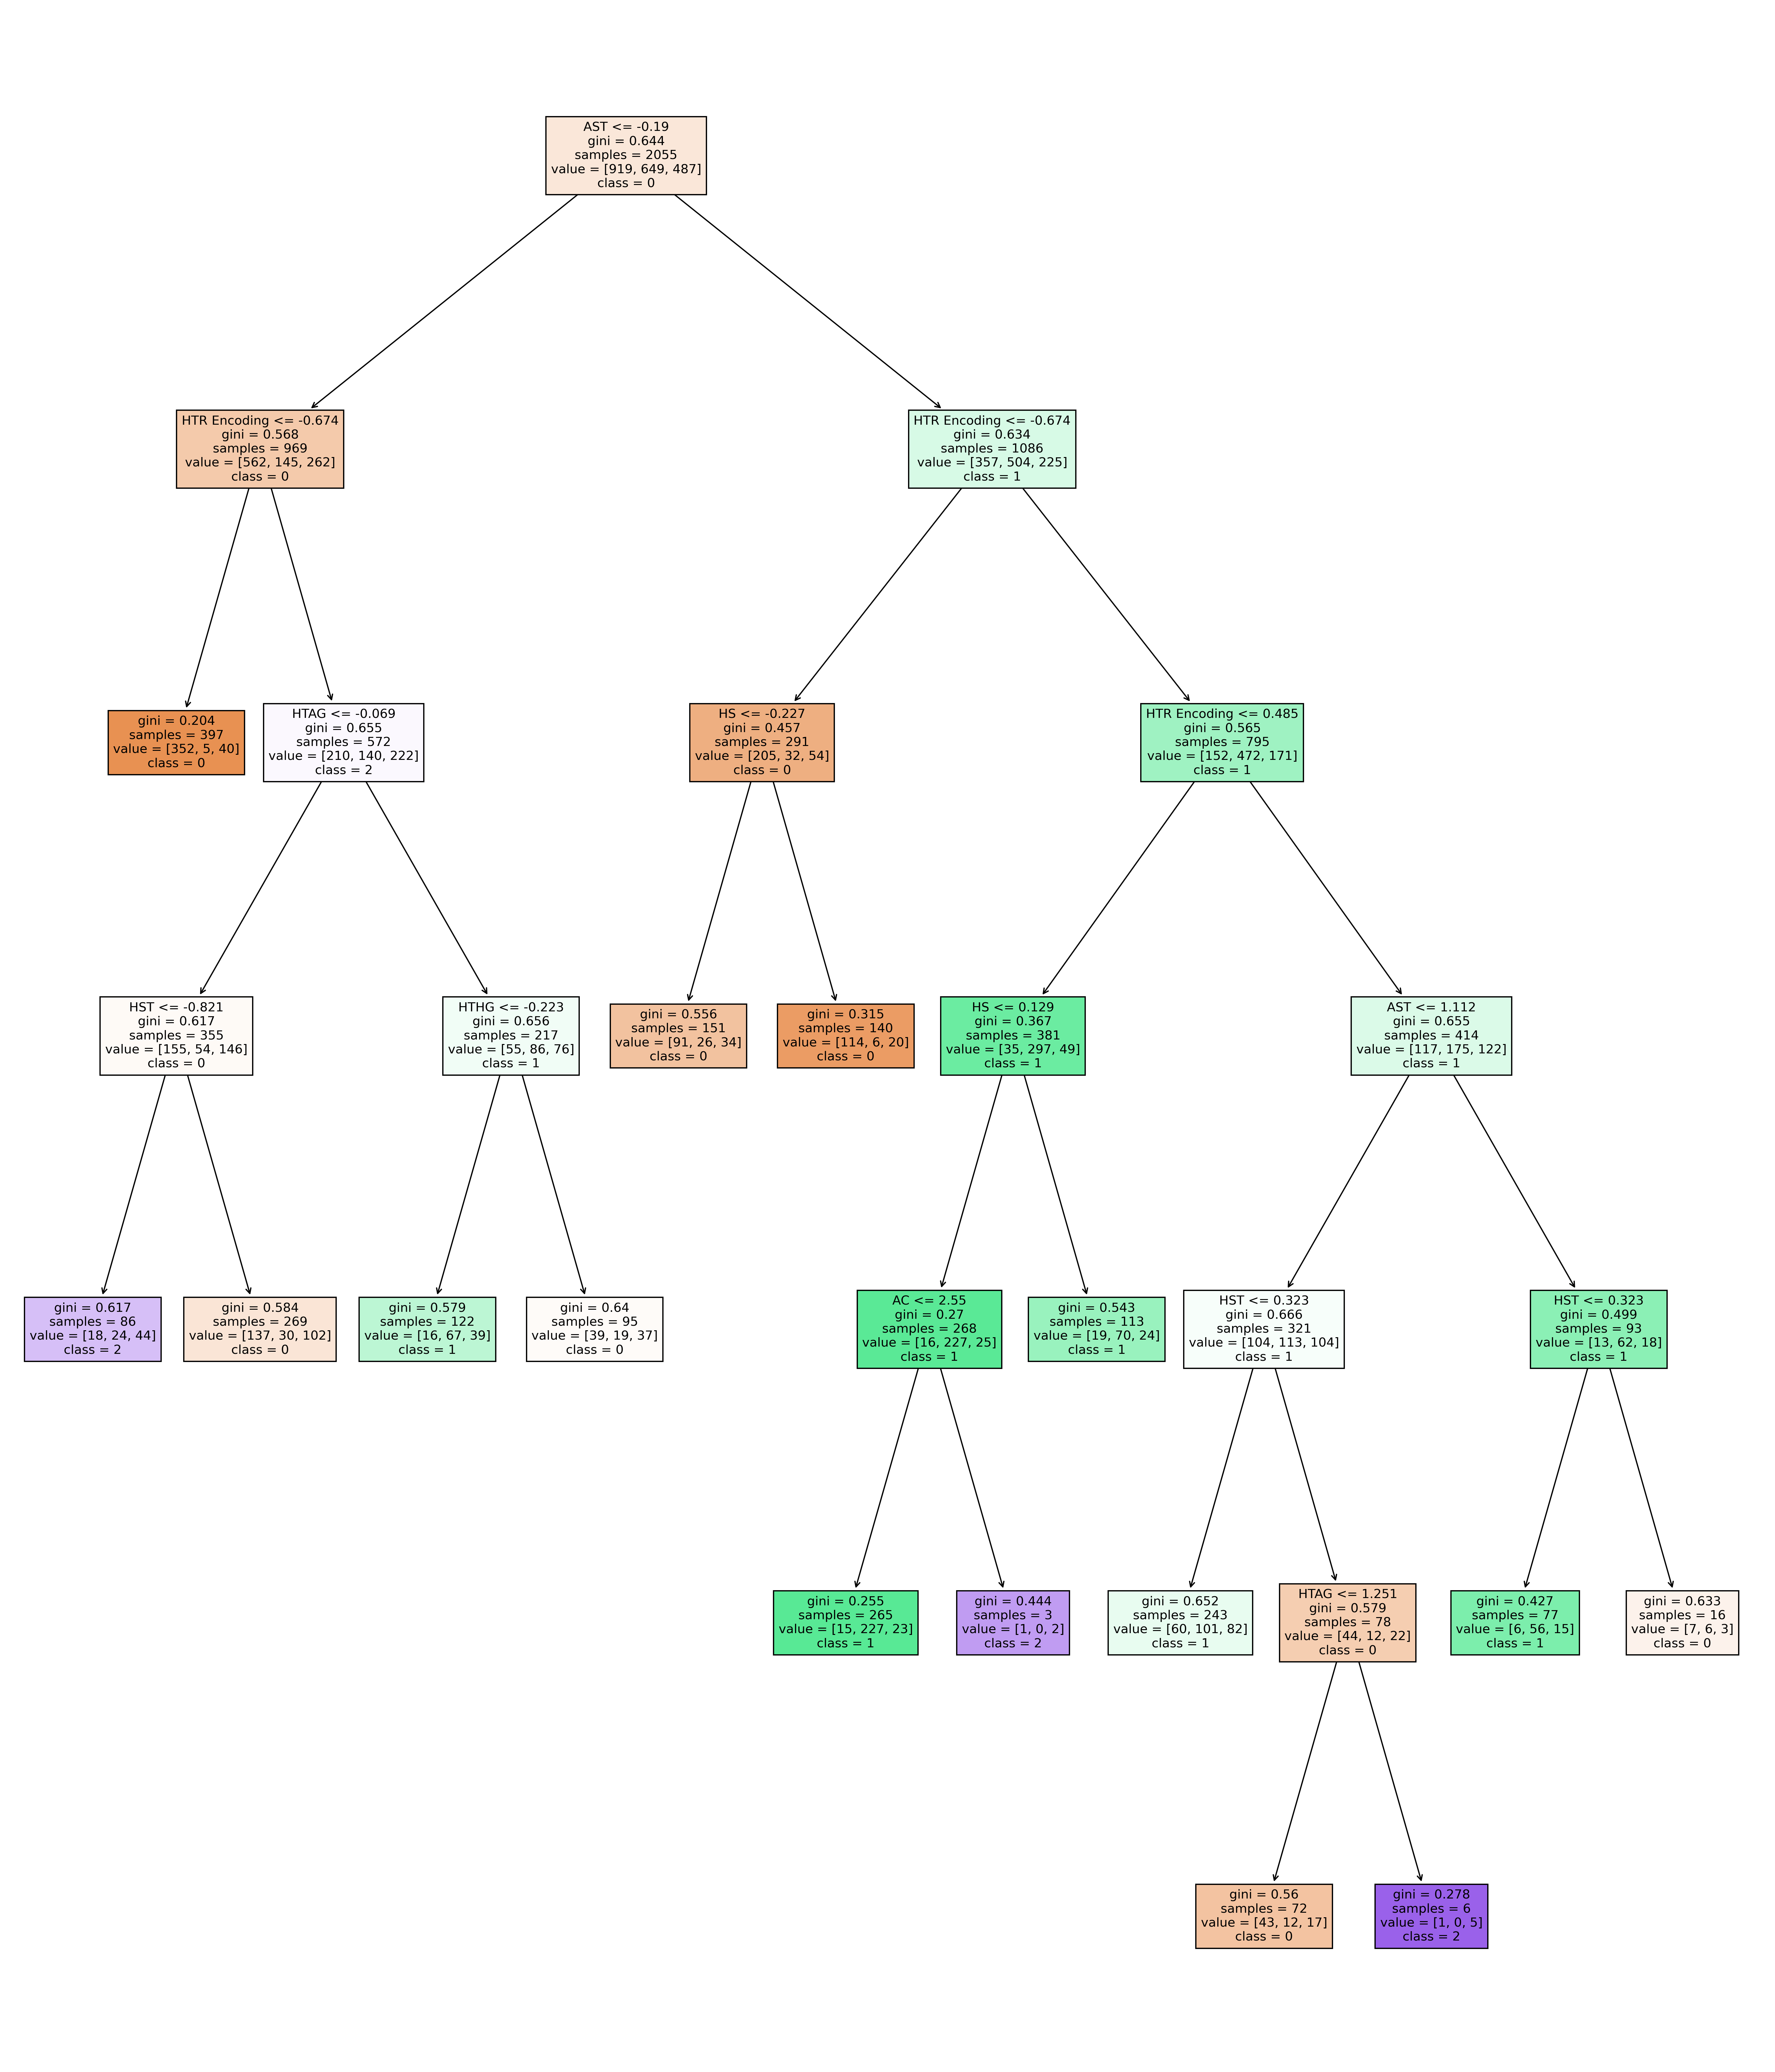

In [26]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (25,30), dpi=300)
tree.plot_tree(
    clf_train,
    feature_names = fn, 
    class_names=cn,           
    filled = True);

# 0 = Home win
# 1 = Away win
# 2 = Draw

Helpful link: https://towardsdatascience.com/scikit-learn-decision-trees-explained-803f3812290d